# Lectura de datos via ftp, manipulación NetCDF y Graficos

## Integrantes: 

* Ines Leyba
* Milagros Alvarez Imaz
* Leandro Díaz

In [154]:
#Abrimos el txt con la informacion de los usuarios de las cosas
usuario = open('usuario', 'r')
#El ftp de donde quiero descargar
FTPusuario='AVISO'

while True:
    line = usuario.readline()
    if line == '':
        break
    
    if FTPusuario in line:
        split = line.split(';') #Separamos los elementos por los ;

usuario.close() #Cerramos el archivo de usuarios
     
#Tomamos de la segunda columna que tiene el nombre del usuario
user=str(split[1])
#Tomamos de la tercera columna que tiene la contraseña
pw=str(split[2])

In [139]:
from ftplib import FTP

ftp = FTP('ftp.aviso.altimetry.fr') #ftp de donde quiero los datos
ftp.login(user, pw)  # 'usuario', 'contraseña'

'230 User cima_leyba logged in'

In [140]:
anio=input('Año entre 1993 a 2015 = ') #elegimos el año que queremos bajar 

Año entre 1993 a 2015 = 2014


In [141]:
ftp.cwd('/global/delayed-time/grids/msla/all-sat-merged/h/'+ anio) # Poner el directorio donde estan los datos
 

'250 CWD command successful'

In [142]:
# Generamos una lista con todos los archivos que estan en el directorio.
ListaDatos=[]
ListaDatos = ftp.nlst()  
ListaDatos 

['dt_global_allsat_msla_h_20141114_20150513.nc.gz',
 'dt_global_allsat_msla_h_20140305_20140829.nc.gz',
 'dt_global_allsat_msla_h_20141127_20150513.nc.gz',
 'dt_global_allsat_msla_h_20141124_20150513.nc.gz',
 'dt_global_allsat_msla_h_20140228_20140829.nc.gz',
 'dt_global_allsat_msla_h_20141122_20150513.nc.gz',
 'dt_global_allsat_msla_h_20141224_20150513.nc.gz',
 'dt_global_allsat_msla_h_20141202_20150513.nc.gz',
 'dt_global_allsat_msla_h_20140425_20140829.nc.gz',
 'dt_global_allsat_msla_h_20141023_20150209.nc.gz',
 'dt_global_allsat_msla_h_20140729_20150209.nc.gz',
 'dt_global_allsat_msla_h_20140717_20150209.nc.gz',
 'dt_global_allsat_msla_h_20141101_20150513.nc.gz',
 'dt_global_allsat_msla_h_20140527_20141010.nc.gz',
 'dt_global_allsat_msla_h_20140509_20141010.nc.gz',
 'dt_global_allsat_msla_h_20140902_20150209.nc.gz',
 'dt_global_allsat_msla_h_20141012_20150209.nc.gz',
 'dt_global_allsat_msla_h_20141113_20150513.nc.gz',
 'dt_global_allsat_msla_h_20141107_20150513.nc.gz',
 'dt_global_

In [143]:
# Bajamos una lista de datos especificos

ListaDatosSelec=[]

for i in ListaDatos:
    if i.endswith('01_20150209.nc.gz'): # Aca decimos que datos queremos seleccionar
        
        localfile = open(i, 'wb') #Localfile es el nombre del archivo en la maquina local, puede ser el mismo nombre que filename o no.
        ftp.retrbinary('RETR ' + i, localfile.write)    # descarga el filename, lo descarga en localfile, velocidad de descarga           
        
        ListaDatosSelec.append(i)
        localfile.close() # Importante cerrar archivos, comentar problema de no cerrarlo
        
print(ListaDatosSelec)

ftp.quit()

['dt_global_allsat_msla_h_20140901_20150209.nc.gz', 'dt_global_allsat_msla_h_20141001_20150209.nc.gz', 'dt_global_allsat_msla_h_20140801_20150209.nc.gz', 'dt_global_allsat_msla_h_20140701_20150209.nc.gz']


'221 Goodbye.'

In [146]:
import os

ListaUncompress_file = []

for compressed_file in ListaDatosSelec:
    print(compressed_file)
    
    uncompressed_file = os.path.splitext(compressed_file)[0]  # Te separa hasta el ultimo "."
    print(uncompressed_file)
   
    ListaUncompress_file.append(uncompressed_file) #Generamos una lsita con todos los nombres sin ".gz"
        
    inF = gzip.open(compressed_file, 'rb') # abre el archivo de entrada en modo lectura binario

    outF = open(uncompressed_file, 'wb')   # crea el archivo de salida en modo escritura binario
    
    # try --> Prueba las funciones, si llega a haber un error, continua. 
    try:
        outF.write( inF.read() ) #  Escribe el archivo de salida
    # except --> Uno puede printiear el error que uno quiere o por ejemplo generar una lista con todos los archivos que presentaron un problema    
    except:
        print('error --> no se puede descomprimir este archivo')

    inF.close()
    outF.close()
    
    print('descomprimí archivo')

dt_global_allsat_msla_h_20140901_20150209.nc.gz
dt_global_allsat_msla_h_20140901_20150209.nc
descomprimí archivo
dt_global_allsat_msla_h_20141001_20150209.nc.gz
dt_global_allsat_msla_h_20141001_20150209.nc
descomprimí archivo
dt_global_allsat_msla_h_20140801_20150209.nc.gz
dt_global_allsat_msla_h_20140801_20150209.nc
descomprimí archivo
dt_global_allsat_msla_h_20140701_20150209.nc.gz
dt_global_allsat_msla_h_20140701_20150209.nc
descomprimí archivo


In [151]:
# Abrir Netcdf 

from netCDF4 import Dataset 
import numpy as np 

#dataset = Dataset(out_nc, mode='r') #Ver tipo de netcdf 
dataset = Dataset('dt_global_allsat_msla_h_20140801_20150209.nc', mode='r') #Ver tipo de netcdf 

print(dataset.file_format) 
#Dimensiones 
dataset.dimensions.keys() 
#Variables del netcdf 
dataset.variables.keys() 

NETCDF3_CLASSIC


odict_keys(['time', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'crs', 'nv', 'sla', 'err'])

In [152]:
#Ver informacion de la variable
dataset.variables['sla']

<class 'netCDF4._netCDF4.Variable'>
int32 sla(time, lat, lon)
    _FillValue: -2147483647
    coordinates: lon lat
    grid_mapping: crs
    long_name: Sea Level Anomalies
    scale_factor: 0.0001
    standard_name: sea_surface_height_above_sea_level
    units: m
unlimited dimensions: 
current shape = (1, 720, 1440)
filling off

In [153]:
#Ver informacion de la variable
dataset.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    axis: T
    calendar: gregorian
    long_name: Time
    standard_name: time
    units: days since 1950-01-01 00:00:00
unlimited dimensions: 
current shape = (1,)
filling off

In [124]:
# EXtraemos las variables

lons = dataset.variables['lon'][:]
lats = dataset.variables['lat'][:]
sla = dataset.variables['sla'][:]
time = dataset.variables['time'][:]

dataset.close() # Cierra netcdf

01-September-2014


/home/ines/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


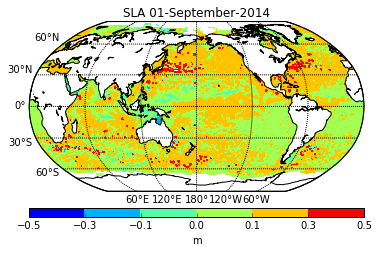

In [126]:
# Pasar a fecha calendario
import datetime
day = time[0]

date = datetime.datetime(1950, 1, 1) + datetime.timedelta(float(day)) #This assumes that the year is 2007

#Pasamos al formato que queremos (buscar documentación strftime)
fecha=date.strftime("%d-%B-%Y")
print(fecha)

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


#Con esto muestra el gráfico dentro de esta pantalla y no aparte
%matplotlib inline

# create Basemap instance for Robinson projection.
m = Basemap(projection='robin',lon_0=0.5*(lons[0]+lons[-1]))
# compute map projection coordinates for lat/lon grid.
x, y = m(*np.meshgrid(lons,lats))
# make filled contour plot.
#clevs = [-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5] # defino los intervalos en la barra de colores 
clevs = [-0.5,-0.3,-0.1,0,0.1,0.3,0.5] # defino los valores 

cs = m.contourf(x,y,sla[0,:,:],clevs,cmap=plt.cm.jet)
#cs = m.contourf(x,y,sla[0,:,:],30,cmap=plt.cm.jet)
m.drawcoastlines() # draw coastlines
m.drawmapboundary() # draw a line around the map region
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0]) # draw parallels
m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1]) # draw meridians
plt.title('SLA ' + fecha) # add a title
cbar = m.colorbar(cs, location='bottom', pad="10%") #Agregamos la barra de colores
cbar.set_label('m')



plt.show()


In [1]:
#Este css es trabajo de @LorenaABarba y su grupo
from IPython.core.display import HTML
css_file = '../../css/personal.css'
HTML(open(css_file, "r").read())